<a href="https://colab.research.google.com/github/webabdullah/data_science/blob/gh-pages/CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import dataset
diabetes_data = pd.read_csv('CC GENERAL.csv')
diabetes_data.head()


CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0  C10001    40.900749  ...          0.000000      12
1  C10002  3202.467416  ...          0.222222      12
2  C10003  2495.148862  ...          0.000000      12
3  C10004  1666.670542  ...          0.000000      12
4  C10005   817.714335  ...          0.000000      12

[5 rows x 18 columns]

In [ ]:
# deskripsi data
diabetes_data.describe().T

count         mean  ...          75%          max
BALANCE                           8950.0  1564.474828  ...  2054.140036  19043.13856
BALANCE_FREQUENCY                 8950.0     0.877271  ...     1.000000      1.00000
PURCHASES                         8950.0  1003.204834  ...  1110.130000  49039.57000
ONEOFF_PURCHASES                  8950.0   592.437371  ...   577.405000  40761.25000
INSTALLMENTS_PURCHASES            8950.0   411.067645  ...   468.637500  22500.00000
CASH_ADVANCE                      8950.0   978.871112  ...  1113.821139  47137.21176
PURCHASES_FREQUENCY               8950.0     0.490351  ...     0.916667      1.00000
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458  ...     0.300000      1.00000
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437  ...     0.750000      1.00000
CASH_ADVANCE_FREQUENCY            8950.0     0.135144  ...     0.222222      1.50000
CASH_ADVANCE_TRX                  8950.0     3.248827  ...     4.000000    123.00000
PURCHASES_TRX                     8950.0    14.709832  ...    17.000000    358.00000
CREDIT_LIMIT                      8949.0  4494.449450  ...  6500.000000  30000.00000
PAYMENTS                          8950.0  1733.143852  ...  1901.134317  50721.48336
MINIMUM_PAYMENTS                  8637.0   864.206542  ...   825.485459  76406.20752
PRC_FULL_PAYMENT                  8950.0     0.153715  ...     0.142857      1.00000
TENURE                            8950.0    11.517318  ...    12.000000     12.00000

[17 rows x 8 columns]

In [ ]:
# replace zeros dengan nan supaya cleaning lebih mudah
diabetes_data_copy = diabetes_data.copy()
diabetes_data_copy[['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']] = diabetes_data_copy[['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']].replace(0,np.NaN)


In [ ]:
## tampilkan NaN
print(diabetes_data_copy.isnull().sum())

CUST_ID                                0
BALANCE                               80
BALANCE_FREQUENCY                     80
PURCHASES                           2044
ONEOFF_PURCHASES                    4302
INSTALLMENTS_PURCHASES              3916
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           1
PAYMENTS                               0
MINIMUM_PAYMENTS                     313
PRC_FULL_PAYMENT                       0
TENURE                                 0
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


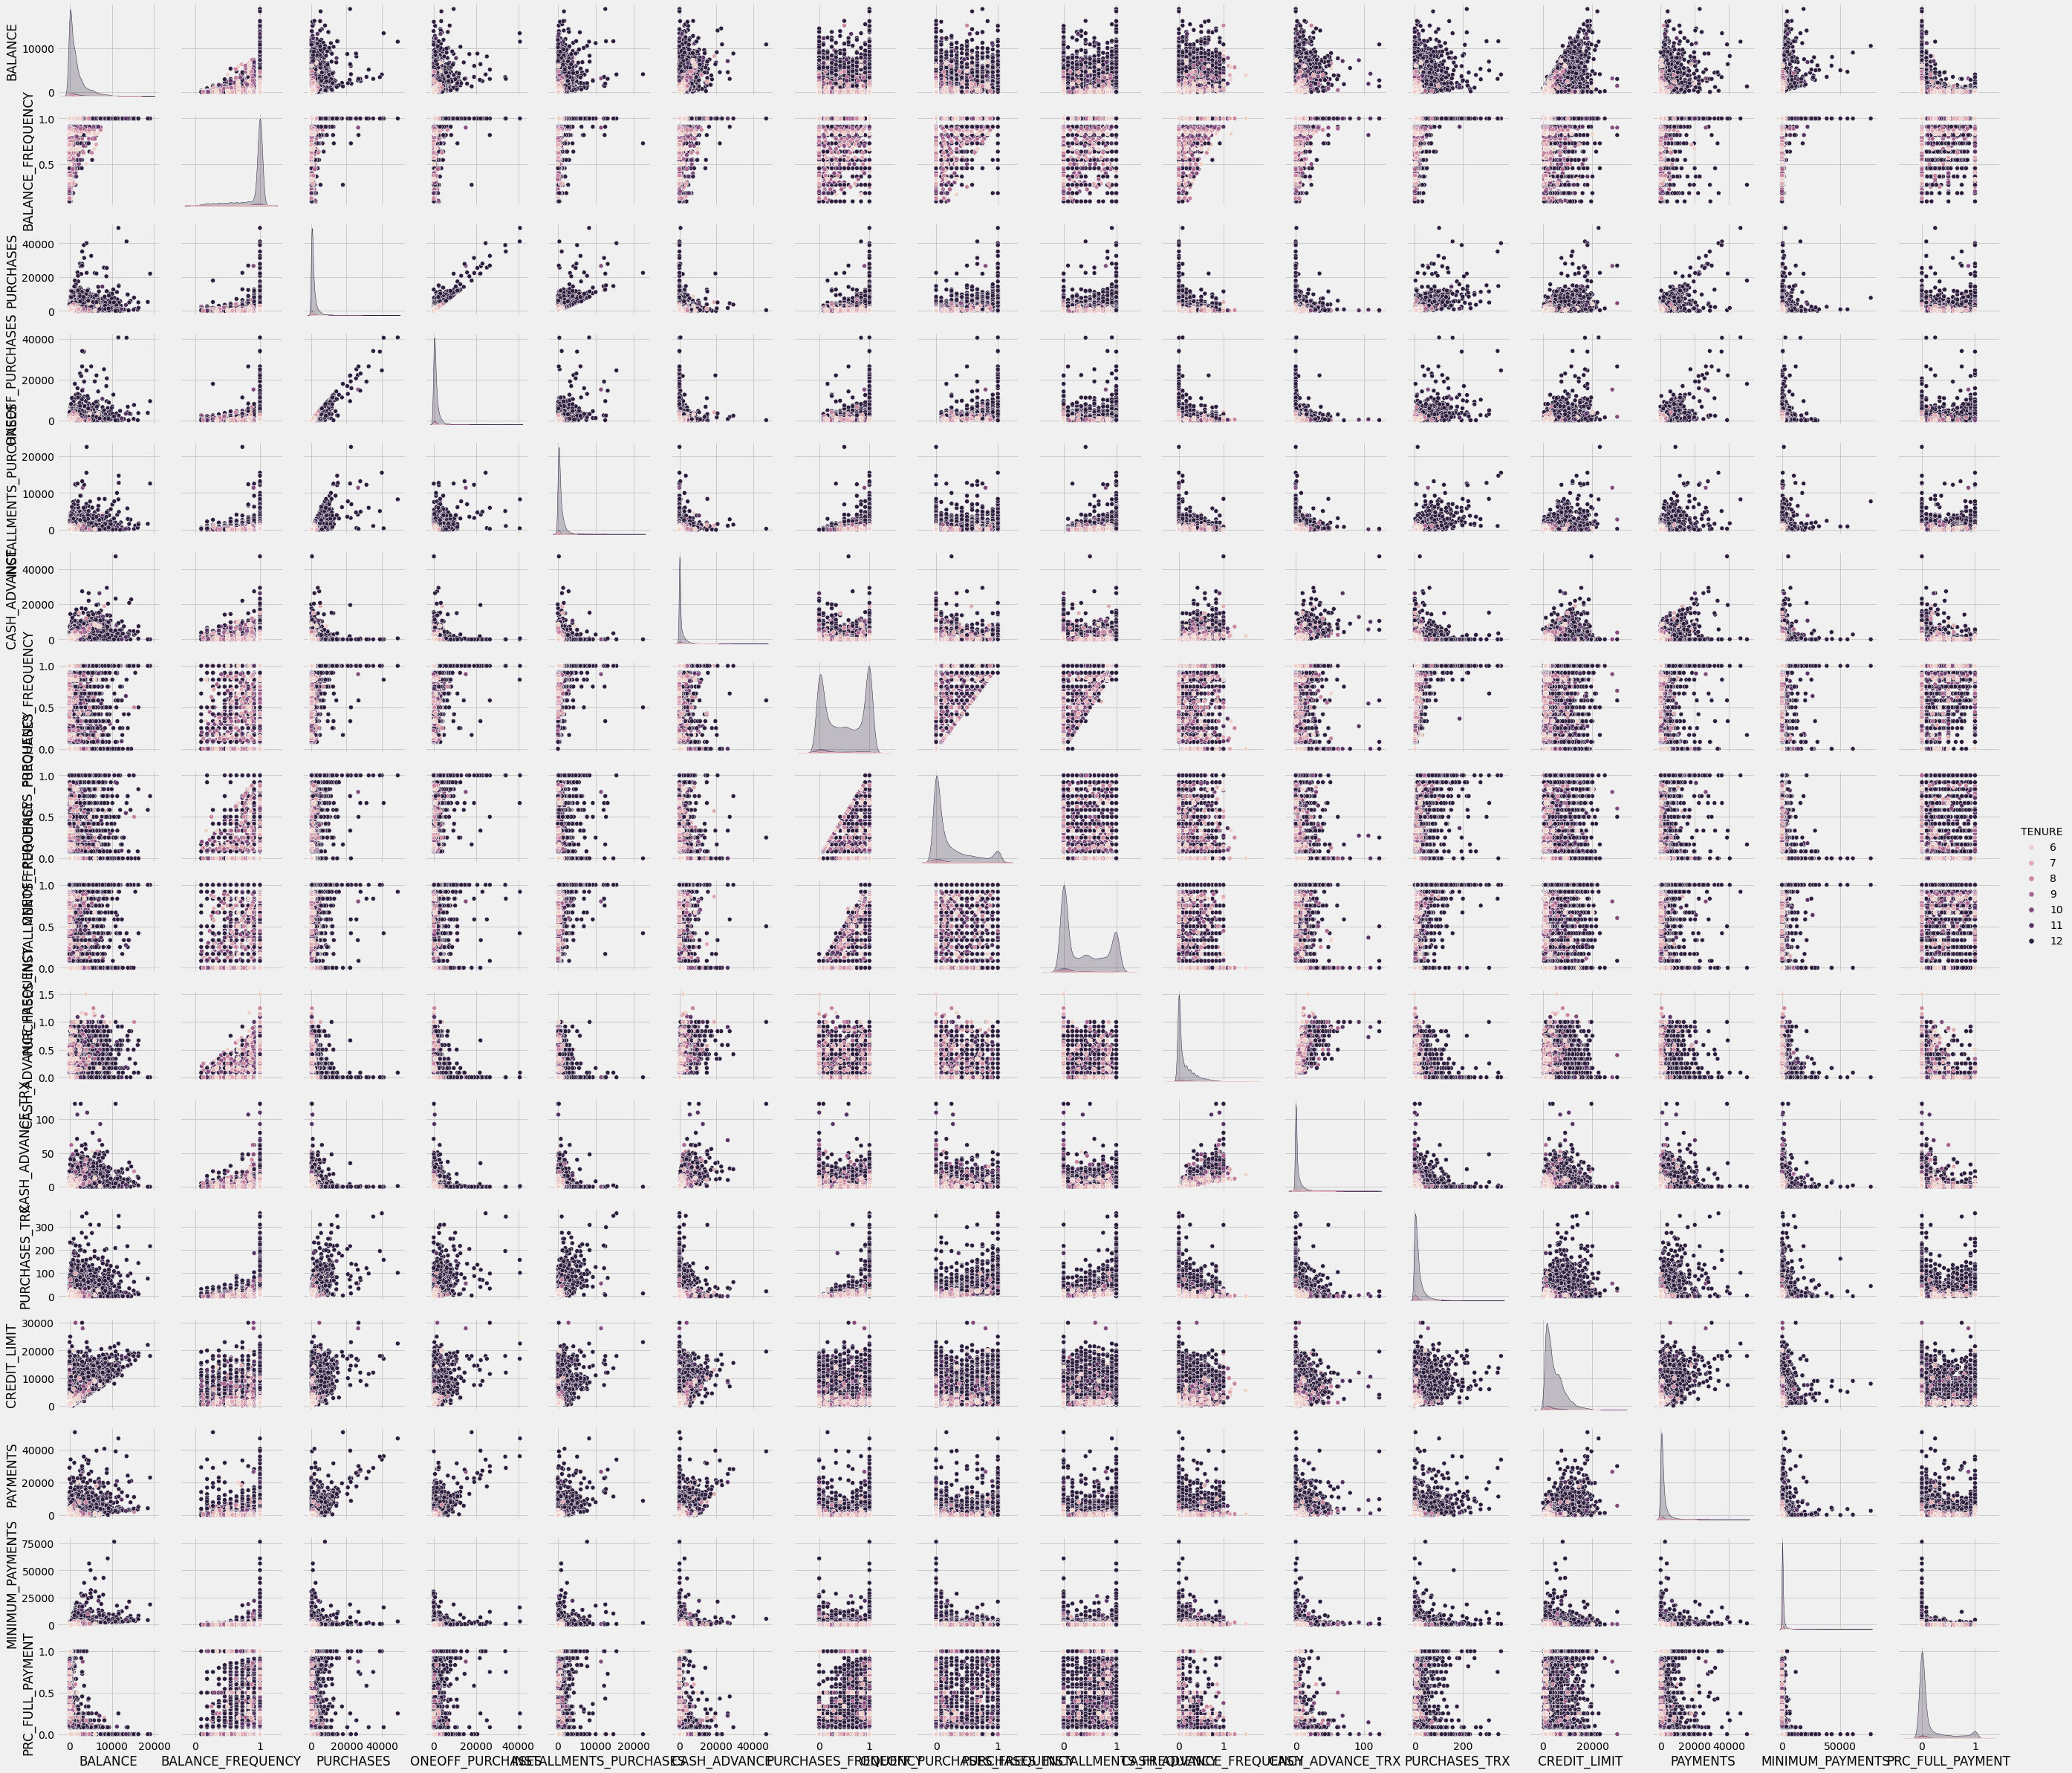

In [ ]:
# cek korelasi
p=sns.pairplot(diabetes_data_copy, hue = 'TENURE')

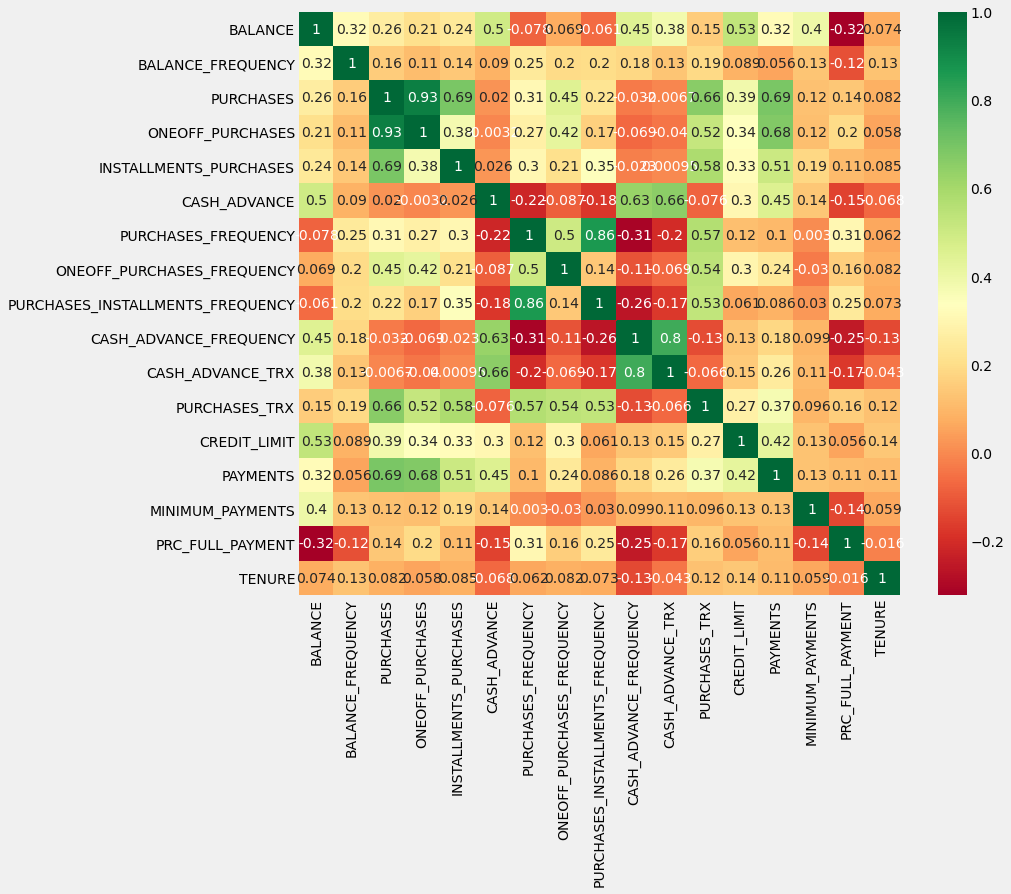

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn') 

In [ ]:
print(diabetes_data_copy.isnull().sum())
diabetes_data_copy.describe()

CUST_ID                                0
BALANCE                               80
BALANCE_FREQUENCY                     80
PURCHASES                           2044
ONEOFF_PURCHASES                    4302
INSTALLMENTS_PURCHASES              3916
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           1
PAYMENTS                               0
MINIMUM_PAYMENTS                     313
PRC_FULL_PAYMENT                       0
TENURE                                 0
dtype: int64


BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT       TENURE
count   8870.000000        8870.000000  ...       8950.000000  8950.000000
mean    1578.585085           0.885183  ...          0.153715    11.517318
std     2085.564823           0.222767  ...          0.292499     1.338331
min        0.000199           0.090909  ...          0.000000     6.000000
25%      135.277756           0.900000  ...          0.000000    12.000000
50%      890.872291           1.000000  ...          0.000000    12.000000
75%     2072.361806           1.000000  ...          0.142857    12.000000
max    19043.138560           1.000000  ...          1.000000    12.000000

[8 rows x 17 columns]

In [ ]:
diabetes_data_copy.head()

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
6   C10007   627.260806  ...          1.000000      12
8   C10009  1014.926473  ...          0.000000      12
12  C10013  1516.928620  ...          0.250000      12
13  C10014   921.693369  ...          0.083333      12
18  C10019  1989.072228  ...          0.000000      12

[5 rows x 18 columns]

In [ ]:
#blok coding no 8 tambahkan utk hapus nan
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

#hapus yang nan
diabetes_data_copy = diabetes_data_copy.dropna() 

# optimasi data menggunakan scaler
X = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["CUST_ID"],axis = 1),), columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'])


In [ ]:
# cek data
X.head()

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT    TENURE
0 -0.519581            0.38447  ...          2.544278  0.266392
1 -0.349519            0.38447  ...         -0.597612  0.266392
2 -0.129301            0.38447  ...          0.187860  0.266392
3 -0.390419            0.38447  ...         -0.335789  0.266392
4  0.077820            0.38447  ...         -0.597612  0.266392

[5 rows x 17 columns]

In [ ]:
# buat variabel target(y)
y = diabetes_data_copy.TENURE

In [ ]:
#import train_test_split dan split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [ ]:
# membuat model untuk mencari jumlah K
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

In [ ]:
#skor yang diperoleh dari data yang sama untuk training dan testing
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,
 list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
#skor yang diperoleh dari pengetesan menggunakan data testing
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,
 list(map(lambda x: x+1, test_scores_ind))))

Max test score 95.18599562363238 % and k = [1]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


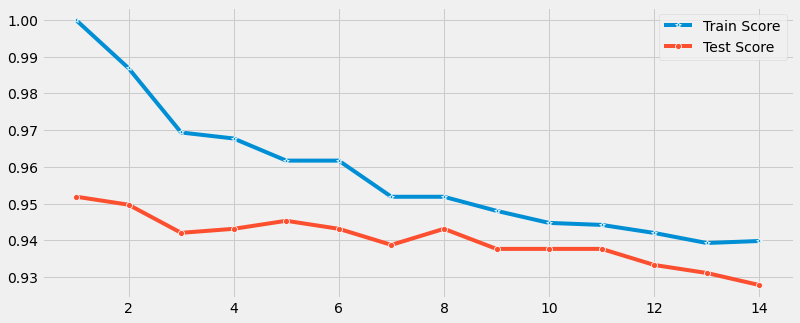

In [ ]:
# visualisasi
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#membuat model KNN dengan K yang sudah diperoleh
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9387308533916849

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[  5,   3,   1,   0,   0,   0,   0],
       [  1,   4,   5,   0,   0,   0,   0],
       [  0,   2,   5,   5,   0,   0,   0],
       [  0,   1,   1,   1,   4,   0,   2],
       [  0,   0,   0,   0,   9,   2,   6],
       [  0,   0,   0,   0,   0,   3,  23],
       [  0,   0,   0,   0,   0,   0, 831]])